# Corpora and Scikit-learn

In [73]:
import nltk
import pandas as pd
import sklearn

In [7]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [9]:
whitmanWords = nltk.corpus.gutenberg.words(['whitman-leaves.txt'])

In [10]:
len(whitmanWords)

154883

In [12]:
gutenbergDict = {fileid: nltk.corpus.gutenberg.words([fileid]) for fileid in nltk.corpus.gutenberg.fileids()}

In [13]:
len(gutenbergDict['whitman-leaves.txt'])

154883

In [15]:
[f"{fileid}: {tokens[:12]}" for fileid, tokens in gutenbergDict.items()]

["austen-emma.txt: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma']",
 "austen-persuasion.txt: ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ']', 'Chapter', '1', 'Sir', 'Walter', 'Elliot']",
 "austen-sense.txt: ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The']",
 "bible-kjv.txt: ['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King']",
 "blake-poems.txt: ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', 'SONGS', 'OF', 'INNOCENCE', 'AND', 'OF']",
 "bryant-stories.txt: ['[', 'Stories', 'to', 'Tell', 'to', 'Children', 'by', 'Sara', 'Cone', 'Bryant', '1918', ']']",
 "burgess-busterbrown.txt: ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920']",
 'carroll-alice.txt: [\'[\', \'Alice\', "\'", \'s\', \'Adventures\', \'in\', \'Wonderland\', \'by\', \'Lewis\', \'Carroll\', \'1865\', \']\']',
 "chesterton-ball.txt: ['['

In [16]:
gutenbergLowered = {}
for fileid, tokens in gutenbergDict.items(): 
    loweredTokens = [token.lower() for token in tokens]
    gutenbergLowered[fileid] = loweredTokens

In [21]:
gutenbergLowered = {fileid: [token.lower() for token in tokens] 
                    for fileid, tokens in gutenbergDict.items()}

In [20]:
[f"{fileid}: {tokens[:12]}" for fileid, tokens in gutenbergLowered.items()]

["austen-emma.txt: ['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter', 'i', 'emma']",
 "austen-persuasion.txt: ['[', 'persuasion', 'by', 'jane', 'austen', '1818', ']', 'chapter', '1', 'sir', 'walter', 'elliot']",
 "austen-sense.txt: ['[', 'sense', 'and', 'sensibility', 'by', 'jane', 'austen', '1811', ']', 'chapter', '1', 'the']",
 "bible-kjv.txt: ['[', 'the', 'king', 'james', 'bible', ']', 'the', 'old', 'testament', 'of', 'the', 'king']",
 "blake-poems.txt: ['[', 'poems', 'by', 'william', 'blake', '1789', ']', 'songs', 'of', 'innocence', 'and', 'of']",
 "bryant-stories.txt: ['[', 'stories', 'to', 'tell', 'to', 'children', 'by', 'sara', 'cone', 'bryant', '1918', ']']",
 "burgess-busterbrown.txt: ['[', 'the', 'adventures', 'of', 'buster', 'bear', 'by', 'thornton', 'w', '.', 'burgess', '1920']",
 'carroll-alice.txt: [\'[\', \'alice\', "\'", \'s\', \'adventures\', \'in\', \'wonderland\', \'by\', \'lewis\', \'carroll\', \'1865\', \']\']',
 "chesterton-ball.txt: ['['

In [22]:
gutenbergFreqs = {fileid: nltk.FreqDist(tokens) for fileid, tokens in gutenbergLowered.items()}

In [28]:
whitmanLowered = [token.lower() for token in whitmanWords]

In [29]:
whitmanFreqs = nltk.FreqDist(whitmanLowered)

In [36]:
gutenbergDf = pd.DataFrame(gutenbergFreqs)

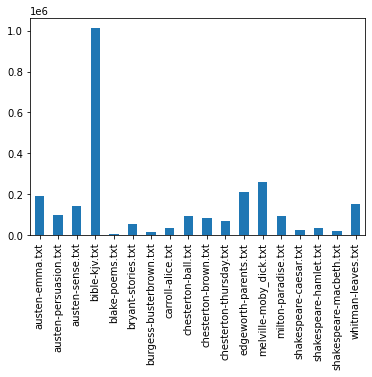

In [40]:
pd.Series({fileid: len(words) 
           for fileid, words in gutenbergLowered.items()}).plot(kind='bar')

In [41]:
gutenbergLengths = pd.Series({fileid: len(words) for fileid, words in gutenbergLowered.items()})

In [46]:
gutenbergPercentagesDf = gutenbergDf / gutenbergLengths

In [49]:
gutenbergPercentagesDf = gutenbergPercentagesDf.fillna(0)

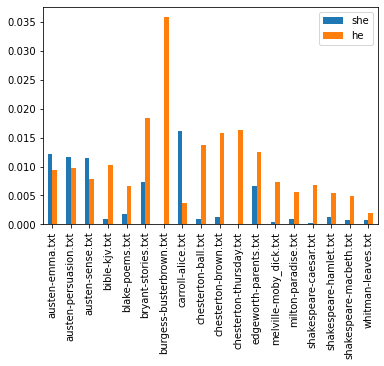

In [60]:
gutenbergPercentagesDf.loc[['she', 'he']].T.plot(kind='bar')

In [69]:
def typeTokenRatio(tokens): 
    return len(set(tokens)) / len(tokens)

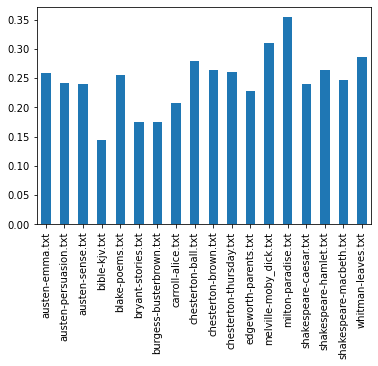

In [72]:
pd.Series({fileid: typeTokenRatio(tokens[4000:8000]) 
           for fileid, tokens in gutenbergLowered.items()}).plot(kind='bar')

# Introducing Scikit-Learn

In [ ]:
sklearn.feature_extraction.text.CountVectorizer

strip_accents: é café -> cafe

In [75]:
whitmanRaw = nltk.corpus.gutenberg.raw('whitman-leaves.txt')

In [85]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
vectorizer.fit_transform([whitmanRaw])

<1x12379 sparse matrix of type '<class 'numpy.int64'>'
	with 12379 stored elements in Compressed Sparse Row format>

In [89]:
whitmanCounts = whitmanVecs.todense()

In [98]:
whitmanCounts

SyntaxError: invalid syntax (<ipython-input-98-eb1e56ffdb41>, line 1)

In [90]:
whitmanWords = vectorizer.get_feature_names()

In [100]:
pd.DataFrame(whitmanCounts, columns=whitmanWords)

,10,11,12,13,14,1492,15,16,16th,17,...,yourselp,yourselves,youth,youthful,youths,zee,zeus,zinc,zones,zuyder
0,7,7,8,6,5,1,5,4,1,3,...,1,5,33,3,7,1,1,1,5,1


In [102]:
fileids = nltk.corpus.gutenberg.fileids()
gutenbergTexts = [nltk.corpus.gutenberg.raw(fileid) for fileid in fileids]

In [103]:
len(gutenbergTexts)

18

In [106]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
gutenbergVecs = vectorizer.fit_transform(gutenbergTexts).todense()

In [112]:
gutenbergCounts = pd.DataFrame(gutenbergVecs, columns=vectorizer.get_feature_names(), index=fileids)

In [117]:
gutenbergFreqs = gutenbergCounts.T / gutenbergLengths

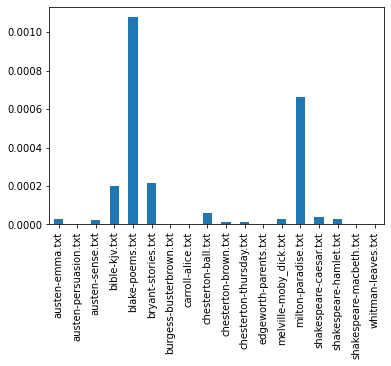

In [119]:
gutenbergFreqs.loc['angel'].plot(kind='bar')

In [123]:
def getDate(tokens): 
    for token in tokens: 
        if token.isnumeric(): 
            return token

In [125]:
gutenbergWords = [nltk.corpus.gutenberg.words(fileid) for fileid in fileids]

In [126]:
dates = [getDate(tokens) for tokens in gutenbergWords]

In [130]:
dateFileids = [f"{date}-{fileid}" for date, fileid in zip(dates, fileids)]

In [131]:
dateFileids

['1816-austen-emma.txt',
 '1818-austen-persuasion.txt',
 '1811-austen-sense.txt',
 '1-bible-kjv.txt',
 '1789-blake-poems.txt',
 '1918-bryant-stories.txt',
 '1920-burgess-busterbrown.txt',
 '1865-carroll-alice.txt',
 '1909-chesterton-ball.txt',
 '1914-chesterton-brown.txt',
 '1908-chesterton-thursday.txt',
 '3-edgeworth-parents.txt',
 '1851-melville-moby_dick.txt',
 '1667-milton-paradise.txt',
 '1599-shakespeare-caesar.txt',
 '1599-shakespeare-hamlet.txt',
 '1603-shakespeare-macbeth.txt',
 '1855-whitman-leaves.txt']

In [132]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
gutenbergVecs = vectorizer.fit_transform(gutenbergTexts).todense()
gutenbergCounts = pd.DataFrame(gutenbergVecs, columns=vectorizer.get_feature_names(), index=dateFileids)

In [147]:
angelCounts = gutenbergCounts.T.loc['thee']

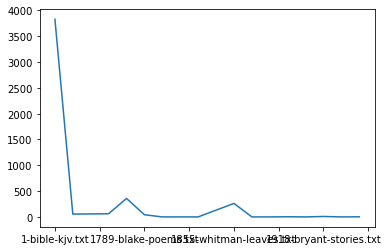

In [148]:
angelCounts.sort_index().plot()